Bond length = 0.5 Å, Final energy = -0.41078847 Ha
Bond length = 0.6666666666666666 Å, Final energy = -0.79761089 Ha
Bond length = 0.8333333333333333 Å, Final energy = -0.98555079 Ha
Bond length = 1.0 Å, Final energy = -1.07896977 Ha
Bond length = 1.1666666666666665 Å, Final energy = -1.12200002 Ha
Bond length = 1.3333333333333333 Å, Final energy = -1.13652726 Ha
Bond length = 1.5 Å, Final energy = -1.13469066 Ha
Bond length = 1.6666666666666665 Å, Final energy = -1.12356599 Ha
Bond length = 1.8333333333333333 Å, Final energy = -1.10732647 Ha
Bond length = 2.0 Å, Final energy = -1.08849626 Ha


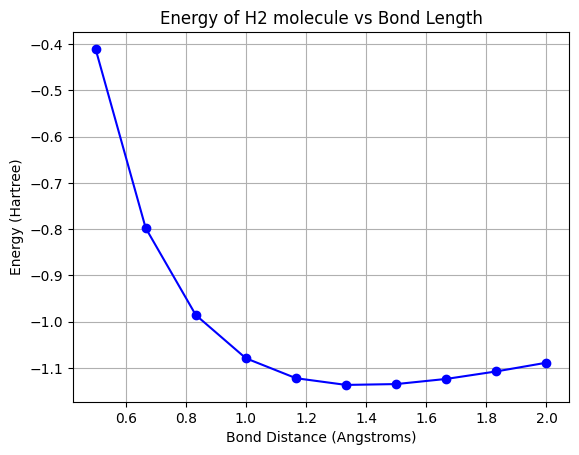

In [82]:
import pennylane as qml
import numpy as np
from pennylane import qchem
import matplotlib.pyplot as plt

# Set up the H2 molecule: two hydrogen atoms
symbols = ["H", "H"]
coordinates = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.74]])  # Initial bond length (in Angstroms)

# Generate the Hamiltonian for the H2 molecule
hamiltonian, qubits = qchem.molecular_hamiltonian(symbols, coordinates, charge=0) # charge = 0 because we are not looking at an ion 

# Hartree-Fock state preparation
hf = qchem.hf_state(electrons=2, orbitals=4)

num_wires = qubits
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def exp_energy(state):
    qml.BasisState(np.array(state), wires=range(num_wires)) # Prep
    return qml.expval(hamiltonian)

def ansatz(params):
    qml.BasisState(hf, wires=range(num_wires))
    
    # Apply single excitation terms (T1)
    qml.SingleExcitation(params[0], wires=[0, 1])

    # Apply double excitation terms (T2)
    qml.DoubleExcitation(params[0], wires=[0, 1, 2, 3])

@qml.qnode(dev)
def cost_function(params):
    ansatz(params)
    return qml.expval(hamiltonian)

# Set up optimizer
opt = qml.GradientDescentOptimizer(stepsize=0.4)
theta = qml.numpy.array([0.0], requires_grad=True)  # Changed this line

# Variables for plotting
distances = []  # To track bond length
energies = []  # To track energies

# Maximum number of optimization steps
max_iterations = 20

# Loop over different bond lengths and calculate the energy
for dist in np.linspace(0.5, 2.0, 10):  # Vary the distance between atoms
    coordinates = np.array([[0.0, 0.0, 0.0], [0.0, 0.0,dist]])  # Update the coordinates with the new distance
    hamiltonian, qubits = qchem.molecular_hamiltonian(symbols, coordinates, charge=0)
    hf = qchem.hf_state(electrons=2, orbitals=4)

    energy = [cost_function(theta)]  # Store initial energy

    for n in range(max_iterations):
        theta, prev_energy = opt.step_and_cost(cost_function, theta)
        energy.append(cost_function(theta))

    distances.append(dist)
    energies.append(energy[-1])  # Store final energy for each bond length

    print(f"Bond length = {dist} Å, Final energy = {energy[-1]: .8f} Ha")

# Plotting energy vs. bond distance
plt.plot(distances, energies, marker='o', linestyle='-', color='b')
plt.xlabel('Bond Distance (Angstroms)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy of H2 molecule vs Bond Length')
plt.grid(True)
plt.show()





  (-0.2427428023979579) [Z2]
+ (-0.2427428023979579) [Z3]
+ (-0.04207897977473324) [I0]
+ (0.1777128756445338) [Z0]
+ (0.17771287564453386) [Z1]
+ (0.12293305067503812) [Z0 Z2]
+ (0.12293305067503812) [Z1 Z3]
+ (0.1676831944885251) [Z0 Z3]
+ (0.1676831944885251) [Z1 Z2]
+ (0.17059738383341397) [Z0 Z1]
+ (0.17627640740462736) [Z2 Z3]
+ (-0.04475014381348698) [Y0 Y1 X2 X3]
+ (-0.04475014381348698) [X0 X1 Y2 Y3]
+ (0.04475014381348698) [Y0 X1 X2 Y3]
+ (0.04475014381348698) [X0 Y1 Y2 X3]
Bond length = 0.1 Å, Final energy =  2.82216512 Ha
Bond length = 0.25263157894736843 Å, Final energy = -0.29264337 Ha
Bond length = 0.4052631578947369 Å, Final energy = -0.90743204 Ha
Bond length = 0.5578947368421052 Å, Final energy = -1.09029779 Ha
Bond length = 0.7105263157894737 Å, Final energy = -1.13587031 Ha
Bond length = 0.8631578947368421 Å, Final energy = -1.12903997 Ha
Bond length = 1.0157894736842106 Å, Final energy = -1.10232054 Ha
Bond length = 1.168421052631579 Å, Final energy = -1.06931229 H

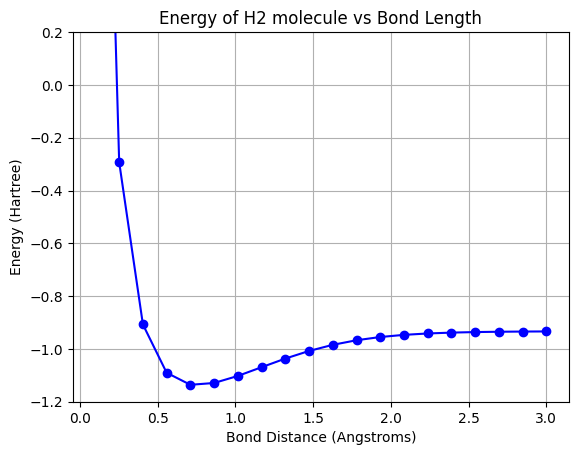

In [70]:
import pennylane as qml
import numpy as np
from pennylane import qchem
import matplotlib.pyplot as plt

# Set up the H2 molecule: two hydrogen atoms
symbols = ["H", "H"]
#coordinates = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.74]])  # Initial bond length (in Angstroms)
coordinates = np.array([[0., 0., -0.66140414], [0., 0., 0.66140414]])

# Generate the Hamiltonian for the H2 molecule
hamiltonian, qubits = qchem.molecular_hamiltonian(symbols, coordinates, charge=0, mapping = "jordan_wigner")  # charge = 0 because we are not looking at an ion

print(hamiltonian)
# Hartree-Fock state preparation
hf = qchem.hf_state(electrons=2, orbitals=4)

num_wires = qubits
dev = qml.device("default.qubit", wires=num_wires)

@qml.qnode(dev)
def exp_energy(state):
    qml.BasisState(np.array(state), wires=range(num_wires))  # Prep
    return qml.expval(hamiltonian)

def ansatz(params):
    qml.BasisState(hf, wires=range(num_wires))
    
    # Apply single excitation terms (T1)
    qml.SingleExcitation(params[0], wires=[0, 1])

    # Apply double excitation terms (T2)
    qml.DoubleExcitation(params[0], wires=[0, 1, 2, 3])

@qml.qnode(dev)
def cost_function(params):
    ansatz(params)
    return qml.expval(hamiltonian)

# Set up optimizer
opt = qml.AdamOptimizer(stepsize=0.4)
theta = qml.numpy.array([0.0], requires_grad=True)  # Changed this line

# Variables for plotting
distances = []  # To track bond length
energies = []  # To track energies

# Maximum number of optimization steps
max_iterations = 50

# Loop over different bond lengths and calculate the energy
for dist in np.linspace(0.1, 3.0, 20):  # Vary the distance between atoms
    coordinates = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, (1.85)*dist]])  # Update the coordinates with the new distance
    hamiltonian, qubits = qchem.molecular_hamiltonian(symbols, coordinates, charge=0)
    hf = qchem.hf_state(electrons=2, orbitals=4)

    energy = [cost_function(theta)]  # Store initial energy

    for n in range(max_iterations):
        theta, prev_energy = opt.step_and_cost(cost_function, theta)
        energy.append(cost_function(theta))

    distances.append(dist)
    energies.append(energy[-1])  # Store final energy for each bond length

    print(f"Bond length = {dist} Å, Final energy = {energy[-1]: .8f} Ha")

# Find the bond length with the minimum energy
min_energy_index = np.argmin(energies)
min_energy = energies[min_energy_index]
min_distance = distances[min_energy_index]

print(f"\nMinimum energy is {min_energy:.8f} Ha at bond length = {min_distance} Å")

# Plotting energy vs. bond distance
plt.plot(distances, energies, marker='o', linestyle='-', color='b')
plt.xlabel('Bond Distance (Angstroms)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy of H2 molecule vs Bond Length')
plt.grid(True)
plt.ylim(-1.2, 0.2)
plt.show()


In [16]:
import pennylane as qml
import numpy as np
from pennylane import qchem
import matplotlib.pyplot as plt

# Set up the H2 molecule with a more accurate basis set
symbols = ["H", "H"]
coordinates = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, 0.74]])  # Initial bond length in Å

# Generate a more accurate Hamiltonian using a better basis set and Jordan-Wigner mapping
hamiltonian, qubits = qchem.molecular_hamiltonian(
    symbols, coordinates, charge=0, mult=1, basis="6-31G", active_electrons=2, active_orbitals=4, mapping="jordan_wigner"
)

# Generate the Hartree-Fock state preparation
hf = qchem.hf_state(electrons=2, orbitals=4)  # Should match the number of qubits
num_wires = qubits  # Should be 4 for 4 orbitals

dev = qml.device("default.qubit", wires=num_wires)  # Use PennyLane's default qubit simulator

# Use UCCSD Ansatz for better accuracy
singles, doubles = qchem.excitations(2, 4)

# Check the structure of singles and doubles
print("Singles:", singles)
print("Doubles:", doubles)

def ansatz(params):
    # Manually initialize the Hartree-Fock state
    # Ensure that the number of wires matches the size of the Hartree-Fock state
    state = np.array(hf, dtype=int)  # Convert hf to a numpy array of integers
    qml.BasisState(state, wires=range(num_wires))  # Set the correct number of wires
    
    # Apply singles excitations
    for idx, (i, j) in enumerate(singles):
        qml.RX(params[idx], wires=i)
        qml.RY(params[idx], wires=i)
    
    # Apply doubles excitations
    for idx, pair in enumerate(doubles):
        i, j, k, l = pair  # Directly unpack the tuple (i, j, k, l)
        qml.CNOT(wires=[i, k])
        qml.CNOT(wires=[j, l])
        qml.RZ(params[len(singles) + idx], wires=i)
        qml.RZ(params[len(singles) + idx], wires=j)

@qml.qnode(dev)
def cost_function(params):
    ansatz(params)
    return qml.expval(hamiltonian)

# Set up a better optimizer
opt = qml.AdamOptimizer(stepsize=0.1)
theta = qml.numpy.array(np.random.randn(len(singles) + len(doubles)), requires_grad=True)

# Variables for plotting
bond_distances = np.linspace(0.5, 2.0, 10)  # Range of distances
energies = []

# Maximum number of optimization steps
max_iterations = 100  # Increased for better convergence

# Loop over different bond lengths and calculate the energy
for dist in bond_distances:
    coordinates = np.array([[0.0, 0.0, 0.0], [0.0, 0.0, dist]])  # Update bond length
    hamiltonian, qubits = qchem.molecular_hamiltonian(
        symbols, coordinates, charge=0, mult=1, basis="6-31G", active_electrons=2, active_orbitals=4, mapping="jordan_wigner"
    )
    hf = qchem.hf_state(electrons=2, orbitals=4)
    
    energy = [cost_function(theta)]
    for _ in range(max_iterations):
        theta, prev_energy = opt.step_and_cost(cost_function, theta)
        energy.append(cost_function(theta))
    
    energies.append(energy[-1])
    print(f"Bond length = {dist:.2f} Å, Final energy = {energy[-1]: .8f} Ha")

# Plotting
plt.plot(bond_distances, energies, marker='o', linestyle='-', color='b')
plt.xlabel('Bond Distance (Å)')
plt.ylabel('Energy (Hartree)')
plt.title('Energy of H2 molecule vs Bond Length')
plt.grid(True)
plt.show()









Singles: [[0, 2], [1, 3]]
Doubles: [[0, 1, 2, 3]]


ValueError: BasisState parameter and wires must be of equal length.

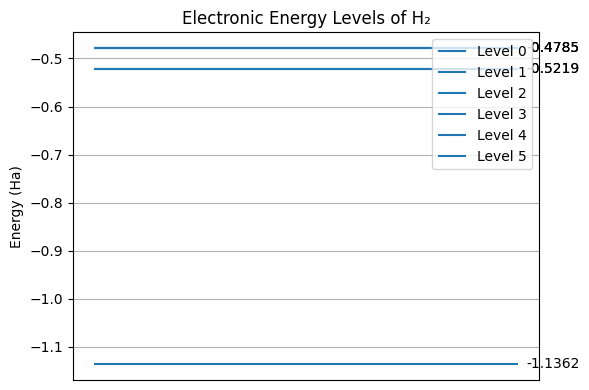

In [64]:
import pennylane as qml
import numpy as np
from pennylane import qchem
import matplotlib.pyplot as plt

# Define molecule
symbols = ['H', 'H']
coordinates = np.array([[0., 0., -0.66140414], [0., 0., 0.66140414]])

# Generate Hamiltonian
hamiltonian, qubits = qchem.molecular_hamiltonian(
    symbols,
    coordinates,
    charge=0,
    mapping="jordan_wigner"
)

# Convert to dense NumPy matrix
H_dense = qml.matrix(hamiltonian)

# Diagonalize to get energy levels
eigenvalues, _ = np.linalg.eigh(H_dense)

# Take lowest few levels
num_levels = 6
energy_levels = np.sort(eigenvalues)[:num_levels]

# Plot energy levels
plt.figure(figsize=(6, 4))
for i, energy in enumerate(energy_levels):
    plt.hlines(energy, xmin=0, xmax=1, label=f"Level {i}")
    # Add annotation with the energy value
    plt.text(1.02, energy, f"{energy:.4f}", va='center', ha='left', fontsize=10)

plt.ylabel("Energy (Ha)")
plt.title("Electronic Energy Levels of H₂")
plt.xticks([])
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()







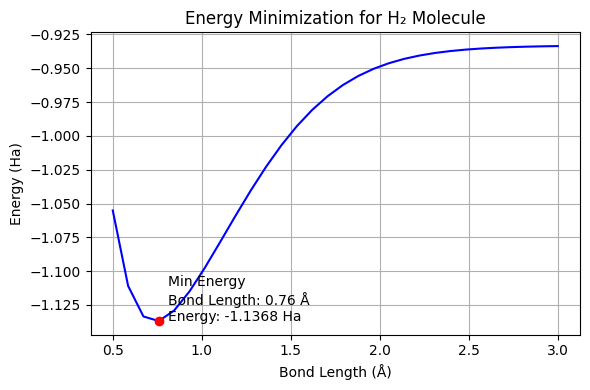

✅ Optimal Bond Length: 0.76 Å
✅ Minimum Energy: -1.1368 Ha


In [86]:
import pennylane as qml
import numpy as np
from pennylane import qchem
import matplotlib.pyplot as plt

ANGSTROM_TO_BOHR = 1.8897259886

def compute_energy(bond_length_angstrom):
    bond_length_bohr = bond_length_angstrom * ANGSTROM_TO_BOHR

    coordinates = np.array([
        [0., 0., -bond_length_bohr / 2],
        [0., 0.,  bond_length_bohr / 2]
    ])

    hamiltonian, qubits = qchem.molecular_hamiltonian(
        symbols=['H', 'H'],
        coordinates=coordinates,
        charge=0,
        mapping="jordan_wigner"
    )

    H_dense = qml.matrix(hamiltonian)
    eigenvalues, _ = np.linalg.eigh(H_dense)
    return np.min(eigenvalues)

# Bond lengths in Angstroms
bond_lengths = np.linspace(0.5, 3.0, 30)

energies = np.array([compute_energy(bond_length) for bond_length in bond_lengths])
min_index = np.argmin(energies)
min_energy = energies[min_index]
optimal_bond_length = bond_lengths[min_index]

# Plotting
plt.figure(figsize=(6, 4))
plt.plot(bond_lengths, energies, label="Energy vs Bond Length", color='b')
plt.scatter(optimal_bond_length, min_energy, color='red', zorder=5)
plt.text(optimal_bond_length + 0.05, min_energy,
         f"Min Energy\nBond Length: {optimal_bond_length:.2f} Å\nEnergy: {min_energy:.4f} Ha",
         fontsize=10)

plt.xlabel("Bond Length (Å)")
plt.ylabel("Energy (Ha)")
plt.title("Energy Minimization for H₂ Molecule")
plt.grid(True)
plt.tight_layout()
plt.show()

print(f"✅ Optimal Bond Length: {optimal_bond_length:.2f} Å")
print(f"✅ Minimum Energy: {min_energy:.4f} Ha")
